In [1]:
import pandas as pd
import numpy as np
from functools import reduce

## Set Up

In [2]:
des_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_descriptive_vars.dta")
ed_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_ed_vars.dta")
inperson_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_inperson_vars.dta")
patterns_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_patterns_vars.dta")
stateprograms_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_stateprograms_vars.dta")
survey0_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_survey0m_vars.dta")
survey6_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_survey6m_vars.dta")
survey12_data = pd.read_stata(r"C:\Users\timom\OneDrive\Desktop\ML\OHIE_Public_Use_Files\OHIE_Data\oregonhie_survey12m_vars.dta")

In [3]:
#Descriptive 
des_data = des_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
des_data.replace(-1, np.nan, inplace=True)
des_subdata = des_data[['person_id', 'household_id', 'treatment',
                    'applied_app', 'approved_app', 'postn_death', 'english_list','numhh_list', 
                    'birthyear_list', 'female_list','zip_msa_list']]
des_subdata.loc[:,"numhh_list"] = des_subdata["numhh_list"] + 1
des_subdata.head(5)

C:\Users\timom\AppData\Local\Temp\ipykernel_25764\3670719386.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_subdata.loc[:,"numhh_list"] = des_subdata["numhh_list"] + 1


,person_id,household_id,treatment,applied_app,approved_app,postn_death,english_list,numhh_list,birthyear_list,female_list,zip_msa_list
0,1.0,100001.0,1,1.0,0.0,0,1,1,1978,0.0,1.0
1,2.0,100002.0,1,0.0,0.0,0,1,1,1984,1.0,1.0
2,3.0,100003.0,0,NaN,NaN,0,1,1,1971,1.0,1.0
3,4.0,100004.0,0,NaN,NaN,0,1,1,1955,1.0,1.0
4,5.0,100005.0,1,0.0,0.0,0,0,1,1969,1.0,1.0


In [5]:
# State
stateprograms_data = stateprograms_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
stateprograms_data.replace(-1, np.nan, inplace=True)
stateprograms_data.head(5)

,person_id,ohp_all_ever_matchn_30sep2009,ohp_all_ever_firstn_survey0m,ohp_all_ever_firstn_survey6m,ohp_all_ever_inperson,ohp_all_ever_firstn_30sep2009,ohp_all_end_30sep2009,ohp_all_end_survey0m,ohp_all_end_survey6m,ohp_all_end_inperson,...,snap_tot_hh_30sep2009,snap_tot_hh_firstn_survey12m,tanf_ever_prenotify07,tanf_ever_presurvey12m,tanf_ever_matchn_30sep2009,tanf_ever_firstn_survey12m,tanf_tot_hh_prenotify07,tanf_tot_hh_presurvey12m,tanf_tot_hh_30sep2009,tanf_tot_hh_firstn_survey12m
0,1.0,0,0.0,NaN,NaN,0,0,0.0,NaN,NaN,...,746,2624.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,2.0,1,1.0,NaN,NaN,1,0,1.0,NaN,NaN,...,3962,5154.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,3.0,0,0.0,NaN,NaN,0,0,0.0,NaN,NaN,...,3212,3374.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,4.0,1,NaN,NaN,NaN,1,1,NaN,NaN,NaN,...,1260,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN
4,5.0,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Education
ed_data = ed_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
ed_data.replace(-1, np.nan, inplace=True)
ed_data.head(5)

,person_id,sample_ed,any_visit_pre_ed,any_visit_ed,num_visit_pre_cens_ed,num_visit_cens_ed,any_hosp_pre_ed,any_hosp_ed,num_hosp_pre_cens_ed,num_hosp_cens_ed,...,ed_charg_tot_pre_ed,ed_charg_tot_ed,any_hiun_pre_ed,any_hiun_ed,num_hiun_pre_cens_ed,num_hiun_cens_ed,any_loun_pre_ed,any_loun_ed,num_loun_pre_cens_ed,num_loun_cens_ed
0,60562.0,1.0,0,0,0.0,0.0,0,0,0.0,0.0,...,0.0,0.000000,0,0,0.0,0.0,0,0,0.0,0.0
1,51142.0,1.0,0,1,0.0,3.0,0,0,0.0,0.0,...,0.0,2220.699951,0,1,0.0,3.0,0,0,0.0,0.0
2,60314.0,1.0,0,1,0.0,2.0,0,1,0.0,1.0,...,0.0,4529.549805,0,1,0.0,2.0,0,0,0.0,0.0
3,50902.0,1.0,0,0,0.0,0.0,0,0,0.0,0.0,...,0.0,0.000000,0,0,0.0,0.0,0,0,0.0,0.0
4,70733.0,1.0,0,0,0.0,0.0,0,0,0.0,0.0,...,0.0,0.000000,0,0,0.0,0.0,0,0,0.0,0.0


In [7]:
# In Person
inperson_data = inperson_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
inperson_data.replace(-1, np.nan, inplace=True)
inperson_data.head(5)

,person_id,in_data_inp,sample_resp_inp,weight_total_inp,dt_release_inp,dt_completed_inp,interview_location_inp,interviewer_inp,scale_id_inp,stadio_id_inp,...,has_hght_wght_inp,has_dbs_inp,has_all_dbs_inp,rx_any_mod_inp,rx_num_mod_inp,hbp_diure_med_inp,antihyperlip_med_inp,diabetes_med_inp,antidep_med_inp,meds_miss_inp
0,45656.0,0,0,3.208729,2010-05-17,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,65912.0,0,1,1.150416,2009-11-30,2009-12-15,1.0,48.0,38.0,38.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,37139.0,0,1,1.003278,2010-03-09,2010-04-07,1.0,28.0,38.0,38.0,...,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0
3,64670.0,0,1,1.159381,2010-01-13,2010-01-19,0.0,6.0,28.0,15.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,65225.0,0,0,0.000000,NaT,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Patterns
patterns_data = patterns_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
patterns_data.replace(-1, np.nan, inplace=True)
patterns_data.head(5)

,person_id,household_id,any_visit_180p_180,any_visit_180p_360,any_visit_180p_540,any_visit_180p_720,preperiod_any_visits,medicaid_all_180p_period_180,medicaid_all_180p_period_360,medicaid_all_180p_period_540,...,pobox_list,first_day_list,self_list,ohp_all_ever_inperson,dt_completed_inp,weight_total_inp,sample_inp_resp,doc_any_incl_probe_inp,ed_any_incl_probe_inp,any_inp_match_ed
0,8218.0,108218.0,0,0,1,0,0,1,1,1,...,0,1,1,0,NaT,NaN,NaN,NaN,NaN,NaN
1,62755.0,162755.0,0,1,1,0,1,0,0,0,...,0,1,1,0,NaT,NaN,NaN,NaN,NaN,NaN
2,27528.0,127528.0,0,0,0,0,1,0,0,0,...,0,1,1,0,NaT,NaN,NaN,NaN,NaN,NaN
3,67031.0,167031.0,0,0,0,0,1,0,0,0,...,0,1,1,0,NaT,NaN,NaN,NaN,NaN,NaN
4,45656.0,145656.0,0,1,0,0,1,0,0,0,...,0,1,1,0,NaT,3.208729,0.0,NaN,NaN,NaN


In [9]:
# Survey 0
survey0_data = survey0_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
survey0_data.replace(-1, np.nan, inplace=True)
survey0_data.head(5)

,person_id,sample_0m,wave_survey0m,dt_mail_0m,returned_0m,dt_returned_0m,ret_mode_0m,surv_lang_0m,in_survey_0m,app_received_0m,...,race_other_qn_0m,employ_hrs_0m,edu_0m,living_arrange_0m,hhsize_0m,hhinc_pctfpl_0m,num19_0m,num19_hi_0m,cost_tot_oop_correct_0m,cost_medical_oop_0m
0,1.0,1,5.0,2008-08-21,0.0,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1,5.0,2008-08-21,0.0,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,1,3.0,2008-07-23,0.0,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0,NaN,NaT,NaN,NaT,,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1,6.0,2008-09-07,0.0,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Survey 6
survey6_data = survey6_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
survey6_data.replace(-1, np.nan, inplace=True)
survey6_data.head(5)

,person_id,sample_6m,wave_survey6m,dt_mail_6m,returned_6m,dt_returned_6m,ret_mode_6m,surv_lang_6m,in_survey_6m,weight_6m,...,live_partner_6m,live_alone_6m,live_parents_6m,live_relatives_6m,live_friends_6m,live_other_6m,hhsize_6m,hhinc_pctfpl_6m,num19_6m,num19_hi_6m
0,1.0,0,5.0,NaT,NaN,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,0,5.0,NaT,NaN,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,0,3.0,NaT,NaN,NaT,,,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0,NaN,NaT,NaN,NaT,,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1,6.0,2009-03-02,1.0,2009-03-09,Mail,Spanish,1.0,1.248947,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,NaN,0.0,NaN


In [11]:
# Survey 12
survey12_data = survey12_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
survey12_data.replace(-1, np.nan, inplace=True)
survey12_data.head(5)

,person_id,sample_12m,dt_mail_12m,dt_returned_12m,ret_mode_12m,returned_12m,surv_lang_12m,in_survey_12m,sample_12m_resp,sample_12m_nonresp,...,live_alone_12m,live_parents_12m,live_relatives_12m,live_friends_12m,live_other_12m,hhsize_12m,num19_12m,needmet_med_cor_12m,needmet_rx_cor_12m,needmet_dent_cor_12m
0,1.0,1,5.0,2009-11-24,Mail,1.0,English,1.0,1,0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2.0,1,5.0,2009-08-31,Mail,1.0,English,1.0,1,0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,3.0,1,3.0,NaT,,0.0,,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,0,NaN,NaT,,NaN,,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1,6.0,2009-08-21,Mail,1.0,Spanish,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,3.0,NaN,1.0,1.0,0.0


In [12]:
dfs = [des_subdata, stateprograms_data, ed_data, inperson_data, patterns_data, survey0_data, survey6_data, survey12_data]

merged = reduce(lambda left, right: pd.merge(left, right, on='person_id', how='outer'), dfs)

merged.describe()
 

,person_id,household_id_x,treatment_x,applied_app,approved_app,postn_death,english_list_x,numhh_list_x,birthyear_list_x,female_list_x,...,live_alone_12m,live_parents_12m,live_relatives_12m,live_friends_12m,live_other_12m,hhsize_12m,num19_12m,needmet_med_cor_12m,needmet_rx_cor_12m,needmet_dent_cor_12m
count,74922.00000,74922.000000,74922.000000,29799.000000,29799.000000,74922.000000,74922.000000,74922.000000,74922.000000,74921.000000,...,23775.000000,23777.000000,23777.000000,23777.000000,23776.000000,22518.000000,2.272100e+04,22940.000000,22860.000000,23172.000000
mean,37461.50000,140311.609375,0.398201,0.608175,0.291889,0.007955,0.914044,1.234270,1968.076987,0.550553,...,0.167739,0.103167,0.231779,0.103041,0.084918,10.330225,7.102876e+07,0.619137,0.719641,0.410236
std,21628.21875,21441.097656,0.489531,0.488166,0.454639,0.088836,0.280301,0.428495,12.202943,0.497441,...,0.373642,0.304183,0.421977,0.304018,0.278765,1089.954956,1.070637e+10,0.485610,0.449184,0.491887
min,1.00000,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1945.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,18731.25000,122288.250000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1958.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,37461.50000,141644.500000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1968.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000e+00,1.000000,1.000000,0.000000
75%,56191.75000,159051.750000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1979.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000e+00,1.000000,1.000000,1.000000
max,74922.00000,174922.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1988.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,163559.000000,1.613841e+12,1.000000,1.000000,1.000000


In [13]:
df_filtered = merged.filter(regex='^(?!.*_y$)')


In [14]:
filtered_columns = [col for col in df_filtered.columns if col.endswith(('_x', '_y', '_z'))]
filtered_columns

['household_id_x',
 'treatment_x',
 'english_list_x',
 'numhh_list_x',
 'birthyear_list_x',
 'female_list_x',
 'ohp_all_ever_inperson_x',
 'any_inp_match_ed_x',
 'weight_total_inp_x',
 'dt_completed_inp_x',
 'doc_any_incl_probe_inp_x',
 'ed_any_incl_probe_inp_x']

In [15]:
df_filtered = df_filtered.rename(lambda x: x.replace('_x', ''), axis=1)

df_filtered.head(5).iloc[:,1:30]


,household_id,treatment,applied_app,approved_app,postn_death,english_list,numhh_list,birthyear_list,female_list,zip_msa_list,...,ohp_all_at_12m,ohp_all_mo_matchn_30sep2009,ohp_all_mo_firstn_survey0m,ohp_all_mo_firstn_survey6m,ohp_all_mo_inperson,ohp_all_mo_firstn_30sep2009,ohp_all_mo_12m,ohp_std_ever_matchn_30sep2009,ohp_std_ever_inperson,ohp_std_ever_firstn_30sep2009
0,100001.0,1,1.0,0.0,0,1,1,1978,0.0,1.0,...,0.0,0,0.0,NaN,NaN,0,0.0,0,NaN,0
1,100002.0,1,0.0,0.0,0,1,1,1984,1.0,1.0,...,0.0,8,6.0,NaN,NaN,12,0.0,1,NaN,1
2,100003.0,0,NaN,NaN,0,1,1,1971,1.0,1.0,...,0.0,0,0.0,NaN,NaN,0,0.0,0,NaN,0
3,100004.0,0,NaN,NaN,0,1,1,1955,1.0,1.0,...,NaN,13,NaN,NaN,NaN,18,NaN,1,NaN,1
4,100005.0,1,0.0,0.0,0,0,1,1969,1.0,1.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0


## Definition of variables

In [34]:
# Self-perceived physical/mental health outcome at 12 

df_filtered[['happiness_12m', 'health_gen_bin_12m', 'health_chg_bin_12m', 'baddays_phys_12m', 'baddays_ment_12m', 'health_work_12m', 'dep_interest_12m', 'dep_sad_12m']].head(3)

,happiness_12m,health_gen_bin_12m,health_chg_bin_12m,baddays_phys_12m,baddays_ment_12m,health_work_12m,dep_interest_12m,dep_sad_12m
0,2.0,0.0,0.0,15.0,30.0,0.0,3.0,3.0
1,1.0,0.0,0.0,3.0,12.0,1.0,2.0,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Self-perceived physical/mental health outcome at 0

df_filtered[[ 'health_gen_bin_0m', 'health_chg_bin_0m', 'baddays_phys_0m', 'baddays_ment_0m']].head(3)

,health_gen_bin_0m,health_chg_bin_0m,baddays_phys_0m,baddays_ment_0m
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [33]:
# Financial health/strain outcome 12

df_filtered[['cost_any_oop_12m', 'cost_tot_oop_12m', 'cost_any_owe_12m', 'cost_tot_owe_12m', 'cost_borrow_12m', 'cost_refused_12m']].head(3)


,cost_any_oop_12m,cost_tot_oop_12m,cost_any_owe_12m,cost_tot_owe_12m,cost_borrow_12m,cost_refused_12m
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Financial health/strain outcome 0

df_filtered[['cost_any_oop_0m', 'cost_tot_oop_0m', 'cost_any_owe_0m', 'cost_tot_owe_0m', 'cost_borrow_0m', 'cost_refused_0m']].head(3)

,cost_any_oop_0m,cost_tot_oop_0m,cost_any_owe_0m,cost_tot_owe_0m,cost_borrow_0m,cost_refused_0m
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Health care utilization outcome 12

df_filtered[['rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m', 'doc_num_mod_12m', 'er_any_12m', 'er_num_mod_12m', 'hosp_any_12m' , 'hosp_num_mod_12m']].head(3)


,rx_any_12m,rx_num_mod_12m,doc_any_12m,doc_num_mod_12m,er_any_12m,er_num_mod_12m,hosp_any_12m,hosp_num_mod_12m
0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
len(df_filtered) - df_filtered['rx_any_12m'].count()



56590

In [21]:
# Health care utilization outcome 0

df_filtered[['rx_any_0m', 'rx_num_mod_0m', 'doc_any_0m', 'doc_num_mod_0m', 'er_any_0m', 'er_num_mod_0m', 'hosp_any_0m' , 'hosp_num_mod_0m']]

,rx_any_0m,rx_num_mod_0m,doc_any_0m,doc_num_mod_0m,er_any_0m,er_num_mod_0m,hosp_any_0m,hosp_num_mod_0m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
74917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74918,1.0,2.0,1.0,8.0,1.0,2.0,0.0,0.0
74919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74920,1.0,5.0,1.0,6.0,0.0,0.0,0.0,0.0


In [22]:
# Treatment and Instrument

df_filtered[['treatment','applied_app','approved_app', 'ohp_all_ever_matchn_30sep2009']]

,treatment,applied_app,approved_app,ohp_all_ever_matchn_30sep2009
0,1,1.0,0.0,0
1,1,0.0,0.0,1
2,0,NaN,NaN,0
3,0,NaN,NaN,1
4,1,0.0,0.0,0
...,...,...,...,...
74917,0,NaN,NaN,0
74918,1,1.0,1.0,1
74919,0,NaN,NaN,1
74920,1,1.0,1.0,1


In [23]:
# Covariates

df_filtered[['female_list', 'birthyear_list', 'english_list']]

,female_list,birthyear_list,english_list
0,0.0,1978,1
1,1.0,1984,1
2,1.0,1971,1
3,1.0,1955,1
4,1.0,1969,0
...,...,...,...
74917,0.0,1955,1
74918,1.0,1979,1
74919,1.0,1965,1
74920,1.0,1948,1


## Trying things to find Covariates

Identify using boost most influential covariates for outcome vectors 

Note we drop any na values in outcome vectors, we could use KNN to impute the missing data if needed 

In [121]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error

In [26]:
df_filtered = df_filtered.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.dtype == 'object' else x)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74922 entries, 0 to 74921
Columns: 646 entries, person_id to needmet_dent_cor_12m
dtypes: datetime64[ns](10), float32(103), float64(509), int16(3), int8(21)
memory usage: 328.6 MB


In [27]:
datetime_columns = df_filtered.select_dtypes('datetime64[ns]').columns
ordinal_encoder = OrdinalEncoder()
df_filtered[datetime_columns] = ordinal_encoder.fit_transform(df_filtered[datetime_columns])
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74922 entries, 0 to 74921
Columns: 646 entries, person_id to needmet_dent_cor_12m
dtypes: float32(103), float64(519), int16(3), int8(21)
memory usage: 328.6 MB


In [75]:
# ignore just for copy and past reasons

df = df_filtered[['person_id',
        # outcome 1
             'happiness_12m', 'health_gen_bin_12m', 'health_chg_bin_12m', 
             'baddays_phys_12m', 'baddays_ment_12m', 'health_work_12m', 
             'dep_interest_12m', 'dep_sad_12m',
        # outcome 2
             'cost_any_oop_12m', 'cost_tot_oop_12m', 'cost_any_owe_12m', 
             'cost_tot_owe_12m', 'cost_borrow_12m', 'cost_refused_12m',
        # outcome 3
             'rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m', 'doc_num_mod_12m', 
             'er_any_12m', 'er_num_mod_12m', 'hosp_any_12m' , 'hosp_num_mod_12m',
             # treatment
             'treatment',
            'applied_app','approved_app', 'ohp_all_ever_matchn_30sep2009',
         
        # covariates
             'female_list', 'birthyear_list', 'english_list', 'numhh_list', 'wave_survey12m', 'household_id'
         
            ]]

#### Self-percieved physical mental health

In [115]:
df = df_filtered.dropna(subset=['happiness_12m', 'health_gen_bin_12m', 'health_chg_bin_12m', 
             'baddays_phys_12m', 'baddays_ment_12m', 'health_work_12m', 
             'dep_interest_12m', 'dep_sad_12m'])

# Features (covariates)

X = df.drop(columns=['person_id','treatment', 'happiness_12m', 'health_gen_bin_12m', 'health_chg_bin_12m', 
             'baddays_phys_12m', 'baddays_ment_12m', 'health_work_12m', 
             'dep_interest_12m', 'dep_sad_12m'])  

# Treatment column

y = df[['happiness_12m', 'health_gen_bin_12m', 'health_chg_bin_12m', 
             'baddays_phys_12m', 'baddays_ment_12m', 'health_work_12m', 
             'dep_interest_12m', 'dep_sad_12m']]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
main_effects_model1 = xgb.XGBRegressor(objective='reg:squarederror')
main_effects_model1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

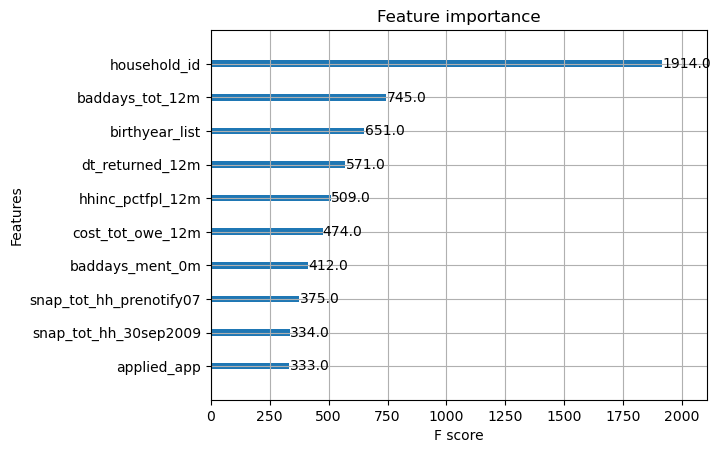

In [117]:
xgb.plot_importance(main_effects_model1,max_num_features=10)

#### Financial health/strain

In [118]:
df = df_filtered.dropna(subset=['cost_any_oop_12m', 'cost_tot_oop_12m', 'cost_any_owe_12m', 
             'cost_tot_owe_12m', 'cost_borrow_12m', 'cost_refused_12m'])

# Features (covariates)

X = df.drop(columns=['person_id','treatment', 'cost_any_oop_12m', 'cost_tot_oop_12m', 'cost_any_owe_12m', 
             'cost_tot_owe_12m', 'cost_borrow_12m', 'cost_refused_12m'])  

# Treatment column

y = df[['cost_any_oop_12m', 'cost_tot_oop_12m', 'cost_any_owe_12m', 
             'cost_tot_owe_12m', 'cost_borrow_12m', 'cost_refused_12m']]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
main_effects_model2 = xgb.XGBRegressor(objective='reg:squarederror')
main_effects_model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

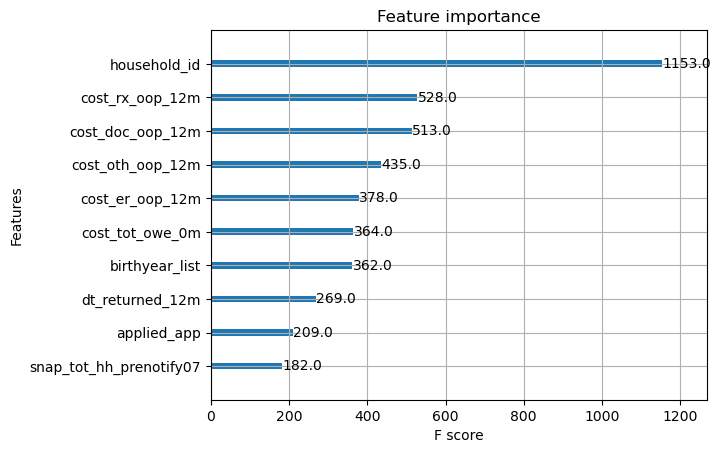

In [120]:
xgb.plot_importance(main_effects_model2,max_num_features=10)

#### Health Care Utilization

In [123]:
# drop NA values which can be replaced by KNN imputation

df = df_filtered.dropna(subset=['rx_any_12m','rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m', 'doc_num_mod_12m', 
             'er_any_12m', 'er_num_mod_12m', 'hosp_any_12m' , 'hosp_num_mod_12m'])

# Features (covariates)

X = df.drop(columns=['person_id','treatment', 'rx_any_12m','rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m', 'doc_num_mod_12m', 
             'er_any_12m', 'er_num_mod_12m', 'hosp_any_12m' , 'hosp_num_mod_12m'])  

# Treatment column

y = df[['rx_any_12m','rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m', 'doc_num_mod_12m', 
             'er_any_12m', 'er_num_mod_12m', 'hosp_any_12m' , 'hosp_num_mod_12m']]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
main_effects_model3 = xgb.XGBRegressor(objective='reg:squarederror')
main_effects_model3.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

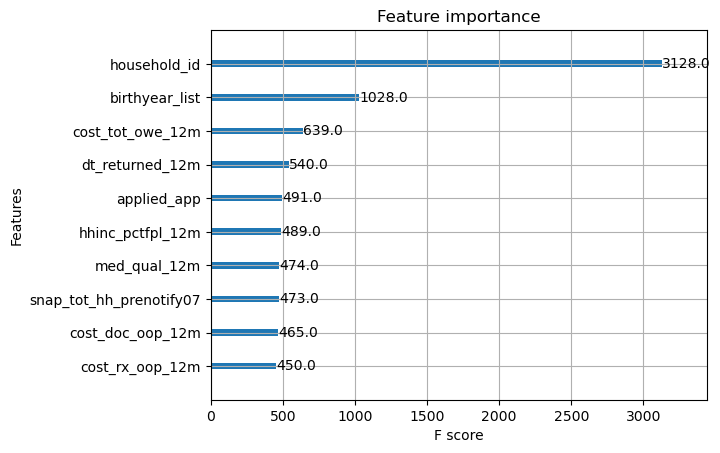

In [125]:
xgb.plot_importance(main_effects_model3,max_num_features=10)

#### KNN Imputation (with cross validation code if we want) takes very long to compute did not have time to compile

Or we could just use mean as filler with simpleimputer

In [156]:
# df = df_filtered

# subset=['rx_any_12m','rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m', 'doc_num_mod_12m', 
#              'er_any_12m', 'er_num_mod_12m', 'hosp_any_12m' , 'hosp_num_mod_12m']

# imputer = KNNImputer(n_neighbors=3)

# df[subset] = imputer.fit_transform(df[subset])


# from sklearn.impute import KNNImputer
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestRegressor

# # Assume df is your DataFrame and 'column_name' is the name of the column with missing values
# # Also assume y is your target variable

# # Split your data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# best_score = float('inf')
# best_k = None

# for k in range(1, 26):  # Try k
#     imputer = KNNImputer(n_neighbors=k)
    
#     # Impute the training set and train your model on this data
#     X_train_imputed = imputer.fit_transform(X_train)
#     model = RandomForestRegressor()
#     model.fit(X_train_imputed, y_train)
    
#     # Impute the test set and evaluate your model on this data
#     X_test_imputed = imputer.transform(X_test)
#     score = model.score(X_test_imputed, y_test)
    
#     if score > best_score:
#         best_score = score
#         best_k = k


# # Now, you can create a new KNNImputer with the best number of neighbors
# imputer = KNNImputer(n_neighbors=best_k)

# # And use it to impute your entire dataset
# df_imputed = imputer.fit_transform(df)



### Non Linearity  using PDP

https://scikit-learn.org/stable/modules/partial_dependence.html#partial-dependence-plots

Problem is that some of the covaraites have na values so 

In [148]:
# Get feature importances
importances = main_effects_model3.get_booster().get_score(importance_type='weight')

# Sort by importance
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Get the names of the top 10 features
top_features_names = [feature for feature, _ in sorted_importances[:3]]

# Map feature names to indices
top_features_indices = [X.columns.get_loc(feature) for feature in top_features_names]


top_features_indices



[0, 6, 569]

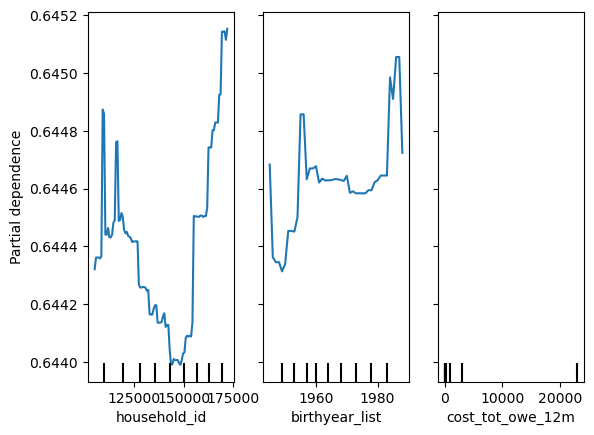

In [155]:
from sklearn.inspection import PartialDependenceDisplay

# choose target for index of outcome in y train

# make sure X_train corresponds to the right data I was lazy , do for loop to do it for all outcoes in outcome vector 

display = PartialDependenceDisplay.from_estimator(
    main_effects_model3, X_train, top_features_indices, target = 0)



In [153]:
y_train.columns

Index(['rx_any_12m', 'rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m',
       'doc_num_mod_12m', 'er_any_12m', 'er_num_mod_12m', 'hosp_any_12m',
       'hosp_num_mod_12m'],
      dtype='object')

## Bad Analysis

In [ ]:
import matplotlib.pyplot as plt

#### Treatment

In [ ]:
des_subdata.describe()

In [ ]:
grouped_mean = des_subdata.groupby('numhh_list')['treatment'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Treatment Number in House')
plt.show()

In [ ]:
grouped_mean = des_subdata.groupby('female_list')['treatment'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Treatment Female')
plt.show()

In [ ]:
grouped_mean = des_subdata.groupby('birthyear_list')['treatment'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Treatment Birth')
plt.show()

In [ ]:
grouped_mean = des_subdata.groupby('zip_msa_list')['treatment'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Treatment Zipcode')
plt.show()

In [ ]:
grouped_mean = des_subdata.groupby('english_list')['treatment'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Treatment English')
plt.show()

#### Applicaton and Approval

In [ ]:
grouped_mean = des_subdata.groupby('numhh_list')['applied_app'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Applied App HH Number')
plt.show()

In [ ]:
grouped_mean = des_subdata.groupby('numhh_list')['approved_app'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Approved HH Number')
plt.show()

In [ ]:
grouped_mean = des_subdata.groupby('female_list')['applied_app'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Applied Female')
plt.show()

In [ ]:
grouped_mean = des_subdata.groupby('female_list')['approved_app'].mean()
grouped_mean.plot(kind='bar')
plt.title('Mean Approved Female')
plt.show()